In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [2]:
import pandas as pd
df = pd.DataFrame(digits.data)

In [3]:
print("Shape of digits.data:", digits.data.shape)
print("Shape of digits.target:", digits.target.shape)

Shape of digits.data: (1797, 64)
Shape of digits.target: (1797,)


In [5]:
roll_number = 12021002029065 #Enter your Enrollment No. here
n = int(str(roll_number)[-2:]) * 2
print("Pixel data of image", n, ":", digits.data[n])
print("Class of image", n, ":", digits.target[n])

Pixel data of image 130 : [ 0.  0.  2. 12.  9.  0.  0.  0.  0.  0. 11. 15. 12.  5.  0.  0.  0.  0.
 15.  5.  0. 14.  0.  0.  0.  2. 15.  1.  0.  9.  7.  0.  0.  4. 10.  0.
  0.  7.  8.  0.  0.  0. 12.  0.  0.  8. 10.  0.  0.  2. 15.  5. 10. 16.
  1.  0.  0.  0.  5. 14. 12.  4.  0.  0.]
Class of image 130 : 0


In [7]:
import numpy as np
image_8x8 = np.reshape(digits.data[n], (8, 8))

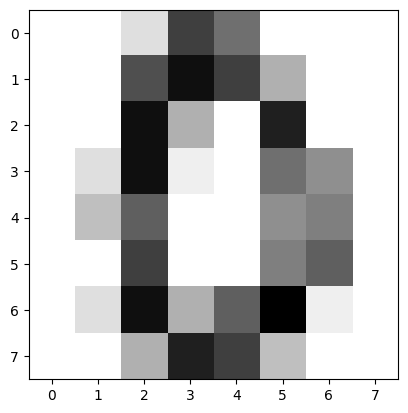

In [8]:
import matplotlib.pyplot as plt
plt.imshow(image_8x8, cmap='binary')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

max_depths = [10, 20, 30, 40, 50]
r2_scores = []

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2_scores.append(r2_score(y_test,y_pred))

print("R2 Scores:", r2_scores)

R2 Scores: [0.6596631858947861, 0.5641186937220295, 0.6292528622009742, 0.6298998903646723, 0.6682902280774278]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

max_depths = [10, 20, 30, 40, 50]
r2_scores_60_40 = []
r2_scores_80_20 = []

for depth in max_depths:
    x_train_60_40, x_test_60_40, y_train_60_40, y_test_60_40 = train_test_split(digits.data, digits.target, test_size=0.4)
    x_train_80_20, x_test_80_20, y_train_80_20, y_test_80_20 = train_test_split(digits.data, digits.target, test_size=0.2)

    model = DecisionTreeClassifier(max_depth=depth)

    model.fit(x_train_60_40,y_train_60_40)
    y_pred = model.predict(x_test_60_40)
    r2_scores_60_40.append(r2_score(y_test_60_40,y_pred))

    model.fit(x_train_80_20,y_train_80_20)
    y_pred = model.predict(x_test_80_20)
    r2_scores_80_20.append(r2_score(y_test_80_20,y_pred))

print("R2 Scores for 60:40 split ratio:", r2_scores_60_40)
print("R2 Scores for 80:20 split ratio:", r2_scores_80_20)

R2 Scores for 60:40 split ratio: [0.5766836286510166, 0.6186479457063184, 0.6224405402625266, 0.5650223535754865, 0.7086276588133851]
R2 Scores for 80:20 split ratio: [0.6587015163868248, 0.6820938653662747, 0.6908315565031983, 0.5690041773104723, 0.6378930647315787]


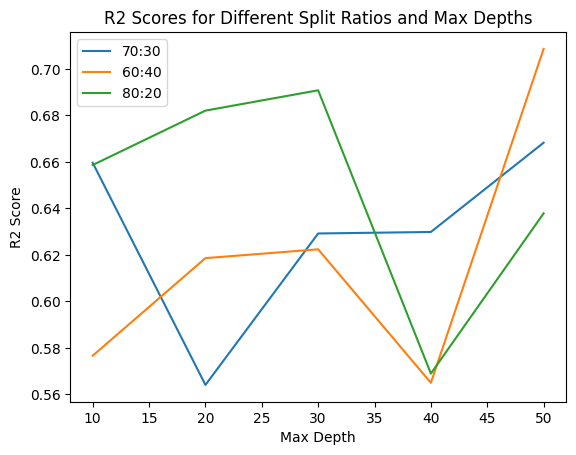

In [12]:
import matplotlib.pyplot as plt

max_depths = [10, 20, 30, 40, 50]

plt.plot(max_depths, r2_scores, label='70:30')
plt.plot(max_depths, r2_scores_60_40, label='60:40')
plt.plot(max_depths, r2_scores_80_20, label='80:20')

plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('R2 Scores for Different Split Ratios and Max Depths')
plt.legend()
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier

max_depths = [10, 20, 30, 40, 50]
r2_scores_rf = []
r2_scores_60_40_rf = []
r2_scores_80_20_rf = []

for depth in max_depths:
    model = RandomForestClassifier(max_depth=depth)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2_scores_rf.append(r2_score(y_test,y_pred))

    x_train_60_40_rf, x_test_60_40_rf, y_train_60_40_rf, y_test_60_40_rf = train_test_split(digits.data, digits.target, test_size=0.4)
    x_train_80_20_rf, x_test_80_20_rf, y_train_80_20_rf, y_test_80_20_rf = train_test_split(digits.data, digits.target, test_size=0.2)

    model.fit(x_train_60_40_rf,y_train_60_40_rf)
    y_pred = model.predict(x_test_60_40_rf)
    r2_scores_60_40_rf.append(r2_score(y_test_60_40_rf,y_pred))

    model.fit(x_train_80_20_rf,y_train_80_20_rf)
    y_pred = model.predict(x_test_80_20_rf)
    r2_scores_80_20_rf.append(r2_score(y_test_80_20_rf,y_pred))

print("R2 Scores for DecisionTreeClassifier with 70:30 split ratio:", r2_scores)
print("R2 Scores for DecisionTreeClassifier with 60:40 split ratio:", r2_scores_60_40)
print("R2 Scores for DecisionTreeClassifier with 80:20 split ratio:", r2_scores_80_20)

print("R2 Scores for RandomForestClassifier with 70:30 split ratio:", r2_scores_rf)
print("R2 Scores for RandomForestClassifier with 60:40 split ratio:", r2_scores_60_40_rf)
print("R2 Scores for RandomForestClassifier with 80:20 split ratio:", r2_scores_80_20_rf)

R2 Scores for DecisionTreeClassifier with 70:30 split ratio: [0.6596631858947861, 0.5641186937220295, 0.6292528622009742, 0.6298998903646723, 0.6682902280774278]
R2 Scores for DecisionTreeClassifier with 60:40 split ratio: [0.5766836286510166, 0.6186479457063184, 0.6224405402625266, 0.5650223535754865, 0.7086276588133851]
R2 Scores for DecisionTreeClassifier with 80:20 split ratio: [0.6587015163868248, 0.6820938653662747, 0.6908315565031983, 0.5690041773104723, 0.6378930647315787]
R2 Scores for RandomForestClassifier with 70:30 split ratio: [0.9439242258128291, 0.93788529628498, 0.8982009022448283, 0.9301209583206025, 0.9109257894642248]
R2 Scores for RandomForestClassifier with 60:40 split ratio: [0.9035692835192517, 0.9185543744393629, 0.9279211402173393, 0.8929373410682563, 0.9367957656404794]
R2 Scores for RandomForestClassifier with 80:20 split ratio: [0.9285198870652959, 0.9392268302290248, 0.942432961655163, 0.9509604950339218, 0.9530587775086055]


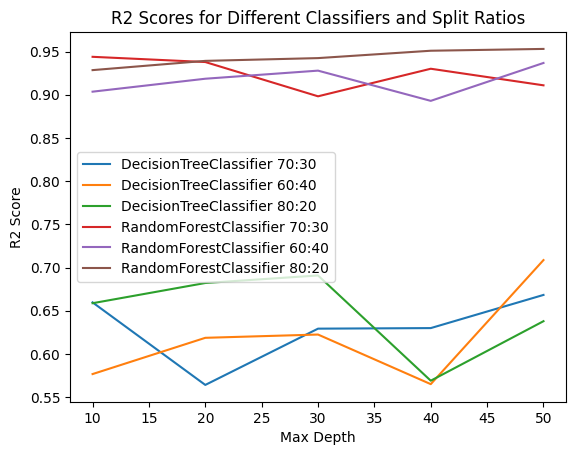

In [14]:
plt.plot(max_depths, r2_scores, label='DecisionTreeClassifier 70:30')
plt.plot(max_depths, r2_scores_60_40, label='DecisionTreeClassifier 60:40')
plt.plot(max_depths, r2_scores_80_20, label='DecisionTreeClassifier 80:20')
plt.plot(max_depths, r2_scores_rf, label='RandomForestClassifier 70:30')
plt.plot(max_depths, r2_scores_60_40_rf, label='RandomForestClassifier 60:40')
plt.plot(max_depths, r2_scores_80_20_rf, label='RandomForestClassifier 80:20')

plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('R2 Scores for Different Classifiers and Split Ratios')
plt.legend()
plt.show()